In [1]:
from json import load
data=[load(open(f"batch_Batch_{i}.json")) for i in range(1,5)]

In [2]:
results_overall={}
results_L2={}
results_L1={}
for d in data:
  for choice in d["data"]["userChoices"]["results"]:
    if choice["dialog_left"]["dialog_type"]=="L3":
      did=choice["dialog_left"]["dialog_id"]
    else:
      did=choice["dialog_right"]["dialog_id"]
    if choice['comparison_type']in ["L2L3","L3L2"]:
      if did not in results_overall:
        results_overall[did]=[[],[],[],[],[]]
        results_L2[did]=[[],[],[],[],[]]
      for q in range(5):
        results_overall[did][q].append(choice["question_responses"][f"q{q+1}_response"])
        results_L2[did][q].append(choice["question_responses"][f"q{q+1}_response"])
    else:
      if did not in results_overall:
        results_overall[did]=[[],[],[],[],[]]
        results_L1[did]=[[],[],[],[],[]]
      for q in range(5):
        results_overall[did][q].append(choice["question_responses"][f"q{q+1}_response"])
        results_L1[did][q].append(choice["question_responses"][f"q{q+1}_response"])

def get_value(val):
  count=0
  for v in val:
    if v=="L3":
      count+=1
    if v=="Same":
      count+=0.5
  return count/len(val)
results_overall={k:list(map(get_value,v)) for k,v in results_overall.items()}
results_L2={k:list(map(get_value,v)) for k,v in results_L2.items()}
results_L1={k:list(map(get_value,v)) for k,v in results_L1.items()}

In [3]:
results_L1

{'6000038': [0.3333333333333333,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666],
 '6000011': [0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666],
 '6000056': [0.6666666666666666,
  0.6666666666666666,
  0.3333333333333333,
  0.3333333333333333,
  0.6666666666666666],
 '6000002': [0.6666666666666666,
  1.0,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666],
 '6000200': [0.6666666666666666,
  0.6666666666666666,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333],
 '6000020': [0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666],
 '6000191': [0.6666666666666666,
  0.6666666666666666,
  0.3333333333333333,
  0.6666666666666666,
  0.3333333333333333],
 '6000029': [1.0, 1.0, 1.0, 1.0, 1.0],
 '6000146': [1.0,
  1.0,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666],
 '6000254': [0.666666666666666

In [4]:
def get_fleiss_kappa(data, index):
  n=3
  N=len(data)
  k=2
  grid=[[3*d[i],3-3*d[i]] for d in data]
  print(grid)
  p0=sum(d[0] for d in grid)/(N*n)
  p1=sum(d[1] for d in grid)/(N*n)
  P=[(k[0]**2+k[1]**2-n)/(n**2-n) for k in grid]
  Pbar=sum(P)/N
  Pebar=(p0**2+p1**2)
  kappa=(Pbar-Pebar)/(1-Pebar)
  return kappa

for i in range(5):
  print(f"Question {i+1}: {get_fleiss_kappa(results_L2.values(),i)}")




[[1.0, 2.0], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0], [1.0, 2.0], [1.0, 2.0], [1.0, 2.0], [3.0, 0.0], [2.0, 1.0], [2.0, 1.0], [3.0, 0.0], [3.0, 0.0], [2.0, 1.0], [2.5, 0.5], [3.0, 0.0], [3.0, 0.0], [1.5, 1.5], [3.0, 0.0], [2.0, 1.0], [1.0, 2.0]]
Question 1: 0.017971758664955057
[[1.0, 2.0], [3.0, 0.0], [1.0, 2.0], [2.0, 1.0], [0.0, 3.0], [0.0, 3.0], [1.0, 2.0], [3.0, 0.0], [3.0, 0.0], [2.0, 1.0], [3.0, 0.0], [3.0, 0.0], [0.5, 2.5], [2.5, 0.5], [3.0, 0.0], [3.0, 0.0], [1.0, 2.0], [3.0, 0.0], [2.0, 1.0], [2.0, 1.0]]
Question 2: 0.32234432234432225
[[1.0, 2.0], [3.0, 0.0], [2.0, 1.0], [0.0, 3.0], [0.0, 3.0], [2.0, 1.0], [2.0, 1.0], [2.0, 1.0], [3.0, 0.0], [3.0, 0.0], [2.0, 1.0], [2.0, 1.0], [0.5, 2.5], [1.5, 1.5], [3.0, 0.0], [3.0, 0.0], [0.5, 2.5], [2.0, 1.0], [1.5, 1.5], [1.5, 1.5]]
Question 3: 0.12906007473411918
[[1.0, 2.0], [3.0, 0.0], [1.0, 2.0], [1.0, 2.0], [0.0, 3.0], [0.0, 3.0], [0.0, 3.0], [3.0, 0.0], [2.0, 1.0], [2.0, 1.0], [3.0, 0.0], [3.0, 0.0], [1.0, 2.0], [2.5, 0.5], [3.0, 0.0],

In [5]:
for i in range(5):
  print(sum([x[i]>0.5 for x in results_overall.values()]),sum([x[i]==0.5 for x in results_overall.values()]),sum([x[i]<0.5 for x in results_overall.values()]))


30 2 8
28 0 12
27 3 10
27 0 13
31 0 9


In [6]:
for i in range(5):
  print(sum([x[i]>0.5 for x in results_L1.values()]),sum([x[i]==0.5 for x in results_L1.values()]),sum([x[i]<0.5 for x in results_L1.values()]))

17 1 2
15 0 5
15 0 5
15 0 5
16 0 4


In [7]:
for i in range(5):
  print(sum([x[i]>0.5 for x in results_L2.values()]),sum([x[i]==0.5 for x in results_L2.values()]),sum([x[i]<0.5 for x in results_L2.values()]))

13 1 6
13 0 7
12 3 5
12 0 8
15 0 5


In [8]:
from scipy.stats import binomtest

for i in range(5):
  successes = sum(x[i] for x in results_L1.values())
  n = len(results_L1)
  # Assuming a null hypothesis of p=0.5 (equal probability of success or failure)
  result = binomtest(k=round(successes*3), n=n*3, p=0.5)
  print(f"Question {i+1}:")
  print(f"  Number of successes: {round(successes*3)}")
  print(f"  Number of trials: {n*3}")
  print(f"  p-value: {result.pvalue}")
  print("-" * 20)

print()
for i in range(5):
  successes = sum(x[i] for x in results_L2.values())
  n = len(results_L2)
  # Assuming a null hypothesis of p=0.5 (equal probability of success or failure)
  result = binomtest(k=round(successes*3), n=n*3, p=0.5)
  print(f"Question {i+1}:")
  print(f"  Number of successes: {round(successes*3)}")
  print(f"  Number of trials: {n*3}")
  print(f"  p-value: {result.pvalue}")
  print("-" * 20)

Question 1:
  Number of successes: 42
  Number of trials: 60
  p-value: 0.002670436282807066
--------------------
Question 2:
  Number of successes: 38
  Number of trials: 60
  p-value: 0.051893895928921435
--------------------
Question 3:
  Number of successes: 34
  Number of trials: 60
  p-value: 0.36629400670329104
--------------------
Question 4:
  Number of successes: 38
  Number of trials: 60
  p-value: 0.051893895928921435
--------------------
Question 5:
  Number of successes: 42
  Number of trials: 60
  p-value: 0.002670436282807066
--------------------

Question 1:
  Number of successes: 41
  Number of trials: 60
  p-value: 0.0062176026593266705
--------------------
Question 2:
  Number of successes: 39
  Number of trials: 60
  p-value: 0.027340133868077935
--------------------
Question 3:
  Number of successes: 36
  Number of trials: 60
  p-value: 0.1550019040032606
--------------------
Question 4:
  Number of successes: 34
  Number of trials: 60
  p-value: 0.366294006703291

In [9]:
# For gemini
results_overall_gemini={}
results_L2_gemini={}
results_L1_gemini={}
for d in data:
  for choice in d["data"]["LLMChoices"]["results"]:
    if choice["dialogLeft"]["dialog_type"]=="L3":
      did=choice["dialogLeft"]["dialog_id"]
    else:
      did=choice["dialog_right"]["dialog_id"]
    if choice['comparison_type']in ["L2L3","L3L2"]:
      if did not in results_overall_gemini:
        results_overall_gemini[did]=[[],[],[],[],[]]
        results_L2_gemini[did]=[[],[],[],[],[]]
      for q in range(5):
        results_overall_gemini[did][q].append(choice["gemini"][q]["choice"])
        results_L2_gemini[did][q].append(choice["gemini"][q]["choice"])
    else:
      if did not in results_overall_gemini:
        results_overall_gemini[did]=[[],[],[],[],[]]
        results_L1_gemini[did]=[[],[],[],[],[]]
      for q in range(5):
        results_overall_gemini[did][q].append(choice["gemini"][q]["choice"])
        results_L1_gemini[did][q].append(choice["gemini"][q]["choice"])

def get_value(val):
  count=0
  for v in val:
    if v=="L3":
      count+=1
    if v=="Same":
      count+=0.5
  return count/len(val)
results_overall_gemini={k:list(map(get_value,v)) for k,v in results_overall_gemini.items()}
results_L2_gemini={k:list(map(get_value,v)) for k,v in results_L2_gemini.items()}
results_L1_gemini={k:list(map(get_value,v)) for k,v in results_L1_gemini.items()}

In [10]:
from scipy.stats import binomtest

for i in range(5):
  successes = sum(x[i] for x in results_L1_gemini.values())
  n = len(results_L1_gemini)
  # Assuming a null hypothesis of p=0.5 (equal probability of success or failure)
  result = binomtest(k=round(successes*3), n=n*3, p=0.5)
  print(f"Question {i+1}:")
  print(f"  Number of successes: {round(successes*3)}")
  print(f"  Number of trials: {n*3}")
  print(f"  p-value: {result.pvalue}")
  print("-" * 20)

print()
for i in range(5):
  successes = sum(x[i] for x in results_L2_gemini.values())
  n = len(results_L2_gemini)
  # Assuming a null hypothesis of p=0.5 (equal probability of success or failure)
  result = binomtest(k=round(successes*3), n=n*3, p=0.5)
  print(f"Question {i+1}:")
  print(f"  Number of successes: {round(successes*3)}")
  print(f"  Number of trials: {n*3}")
  print(f"  p-value: {result.pvalue}")
  print("-" * 20)

Question 1:
  Number of successes: 50
  Number of trials: 60
  p-value: 1.6163814566157175e-07
--------------------
Question 2:
  Number of successes: 50
  Number of trials: 60
  p-value: 1.6163814566157175e-07
--------------------
Question 3:
  Number of successes: 30
  Number of trials: 60
  p-value: 1.0
--------------------
Question 4:
  Number of successes: 41
  Number of trials: 60
  p-value: 0.0062176026593266705
--------------------
Question 5:
  Number of successes: 41
  Number of trials: 60
  p-value: 0.0062176026593266705
--------------------

Question 1:
  Number of successes: 42
  Number of trials: 60
  p-value: 0.002670436282807066
--------------------
Question 2:
  Number of successes: 43
  Number of trials: 60
  p-value: 0.0010657657791434353
--------------------
Question 3:
  Number of successes: 40
  Number of trials: 60
  p-value: 0.01348929373119186
--------------------
Question 4:
  Number of successes: 41
  Number of trials: 60
  p-value: 0.0062176026593266705
----

In [11]:
# For GPT
results_overall_gpt={}
results_L2_gpt={}
results_L1_gpt={}
for d in data:
  print("x")
  for choice in d["data"]["LLMChoices"]["results"]:
    if choice["dialogLeft"]["dialog_type"]=="L3":
      did=choice["dialogLeft"]["dialog_id"]
    else:
      did=choice["dialog_right"]["dialog_id"]
    if choice['comparison_type']in ["L2L3","L3L2"]:
      if did not in results_overall_gpt:
        results_overall_gpt[did]=[[],[],[],[],[]]
        results_L2_gpt[did]=[[],[],[],[],[]]
      for q in range(5):
        results_overall_gpt[did][q].append(choice["gpt"][q]["choice"])
        results_L2_gpt[did][q].append(choice["gpt"][q]["choice"])
    else:
      if did not in results_overall_gpt:
        results_overall_gpt[did]=[[],[],[],[],[]]
        results_L1_gpt[did]=[[],[],[],[],[]]
      for q in range(5):
        results_overall_gpt[did][q].append(choice["gpt"][q]["choice"])
        results_L1_gpt[did][q].append(choice["gpt"][q]["choice"])

def get_value(val):
  count=0
  for v in val:
    if v=="L3":
      count+=1
    if v=="Same":
      count+=0.5
  return count/len(val)
results_overall_gpt={k:list(map(get_value,v)) for k,v in results_overall_gpt.items()}
results_L2_gpt={k:list(map(get_value,v)) for k,v in results_L2_gpt.items()}
results_L1_gpt={k:list(map(get_value,v)) for k,v in results_L1_gpt.items()}

x
x
x
x


In [12]:
from scipy.stats import binomtest

for i in range(5):
  successes = sum(x[i] for x in results_L1_gpt.values())
  n = len(results_L1_gpt)
  # Assuming a null hypothesis of p=0.5 (equal probability of success or failure)
  result = binomtest(k=round(successes*3), n=n*3, p=0.5)
  print(f"Question {i+1}:")
  print(f"  Number of successes: {round(successes*3)}")
  print(f"  Number of trials: {n*3}")
  print(f"  p-value: {result.pvalue}")
  print("-" * 20)

print()
for i in range(5):
  successes = sum(x[i] for x in results_L2_gpt.values())
  n = len(results_L2_gpt)
  # Assuming a null hypothesis of p=0.5 (equal probability of success or failure)
  result = binomtest(k=round(successes*3), n=n*3, p=0.5)
  print(f"Question {i+1}:")
  print(f"  Number of successes: {round(successes*3)}")
  print(f"  Number of trials: {n*3}")
  print(f"  p-value: {result.pvalue}")
  print("-" * 20)

Question 1:
  Number of successes: 45
  Number of trials: 60
  p-value: 0.00013451408092849532
--------------------
Question 2:
  Number of successes: 47
  Number of trials: 60
  p-value: 1.2146708022957309e-05
--------------------
Question 3:
  Number of successes: 32
  Number of trials: 60
  p-value: 0.6988834276200058
--------------------
Question 4:
  Number of successes: 32
  Number of trials: 60
  p-value: 0.6988834276200058
--------------------
Question 5:
  Number of successes: 49
  Number of trials: 60
  p-value: 7.561280982396751e-07
--------------------

Question 1:
  Number of successes: 43
  Number of trials: 60
  p-value: 0.0010657657791434353
--------------------
Question 2:
  Number of successes: 45
  Number of trials: 60
  p-value: 0.00013451408092849532
--------------------
Question 3:
  Number of successes: 39
  Number of trials: 60
  p-value: 0.027340133868077935
--------------------
Question 4:
  Number of successes: 42
  Number of trials: 60
  p-value: 0.002670436

In [13]:
# For Llama
results_overall_llama={}
results_L2_llama={}
results_L1_llama={}
for d in data:
  print("x")
  for choice in d["data"]["LLMChoices"]["results"]:
    if choice["dialogLeft"]["dialog_type"]=="L3":
      did=choice["dialogLeft"]["dialog_id"]
    else:
      did=choice["dialog_right"]["dialog_id"]
    if choice['comparison_type']in ["L2L3","L3L2"]:
      if did not in results_overall_llama:
        results_overall_llama[did]=[[],[],[],[],[]]
        results_L2_llama[did]=[[],[],[],[],[]]
      for q in range(5):
        results_overall_llama[did][q].append(choice["llama"][q]["choice"])
        results_L2_llama[did][q].append(choice["llama"][q]["choice"])
    else:
      if did not in results_overall_llama:
        results_overall_llama[did]=[[],[],[],[],[]]
        results_L1_llama[did]=[[],[],[],[],[]]
      for q in range(5):
        results_overall_llama[did][q].append(choice["llama"][q]["choice"])
        results_L1_llama[did][q].append(choice["llama"][q]["choice"])

def get_value(val):
  count=0
  for v in val:
    if v=="L3":
      count+=1
    if v=="Same":
      count+=0.5
  return count/len(val)
results_overall_llama={k:list(map(get_value,v)) for k,v in results_overall_llama.items()}
results_L2_llama={k:list(map(get_value,v)) for k,v in results_L2_llama.items()}
results_L1_llama={k:list(map(get_value,v)) for k,v in results_L1_llama.items()}

x
x
x
x


In [14]:
from scipy.stats import binomtest

for i in range(5):
  successes = sum(x[i] for x in results_L1.values())
  n = len(results_L1)
  # Assuming a null hypothesis of p=0.5 (equal probability of success or failure)
  result = binomtest(k=round(successes*3), n=n*3, p=0.5)
  print(f"Question {i+1}:")
  print(f"  Number of successes: {round(successes*3)}")
  print(f"  Number of trials: {n*3}")
  print(f"  p-value: {result.pvalue}")
  print("-" * 20)

print()
for i in range(5):
  successes = sum(x[i] for x in results_L2.values())
  n = len(results_L2)
  # Assuming a null hypothesis of p=0.5 (equal probability of success or failure)
  result = binomtest(k=round(successes*3), n=n*3, p=0.5)
  print(f"Question {i+1}:")
  print(f"  Number of successes: {round(successes*3)}")
  print(f"  Number of trials: {n*3}")
  print(f"  p-value: {result.pvalue}")
  print("-" * 20)

Question 1:
  Number of successes: 42
  Number of trials: 60
  p-value: 0.002670436282807066
--------------------
Question 2:
  Number of successes: 38
  Number of trials: 60
  p-value: 0.051893895928921435
--------------------
Question 3:
  Number of successes: 34
  Number of trials: 60
  p-value: 0.36629400670329104
--------------------
Question 4:
  Number of successes: 38
  Number of trials: 60
  p-value: 0.051893895928921435
--------------------
Question 5:
  Number of successes: 42
  Number of trials: 60
  p-value: 0.002670436282807066
--------------------

Question 1:
  Number of successes: 41
  Number of trials: 60
  p-value: 0.0062176026593266705
--------------------
Question 2:
  Number of successes: 39
  Number of trials: 60
  p-value: 0.027340133868077935
--------------------
Question 3:
  Number of successes: 36
  Number of trials: 60
  p-value: 0.1550019040032606
--------------------
Question 4:
  Number of successes: 34
  Number of trials: 60
  p-value: 0.366294006703291

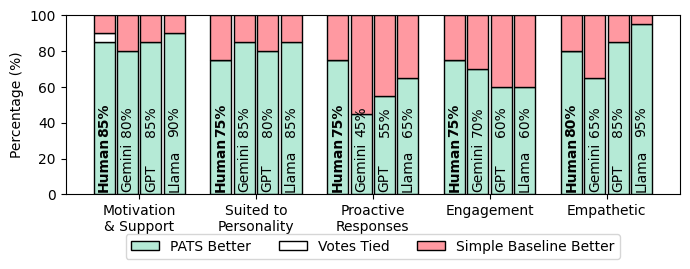

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


# Combine all L1 results into a single dictionary
l1_results = {
    "Human": results_L1,
    "Gemini": results_L1_gemini,
    "GPT": results_L1_gpt,
    "Llama": results_L1_llama,
}

# Prepare data for stacked bar chart
data_for_chart = {}
for model_name, results in l1_results.items():
    wins = [sum(x[i] > 0.51 for x in results.values()) for i in range(5)]
    ties = [sum((0.49<x[i] and x[i]<0.51) for x in results.values()) for i in range(5)]
    losses = [sum(x[i] < 0.49 for x in results.values()) for i in range(5)]
    total = [len(results) for _ in range(5)]

    data_for_chart[model_name + " Wins"] = [w / t * 100 for w, t in zip(wins, total)]
    data_for_chart[model_name + " Ties"] = [ti / t * 100 for ti, t in zip(ties, total)]
    data_for_chart[model_name + " Losses"] = [l / t * 100 for l, t in zip(losses, total)]

df_chart = pd.DataFrame(data_for_chart)

# Create grouped stacked bar chart
questions = ["Motivation\n& Support","Suited to\nPersonality","Proactive\nResponses","Engagement","Empathetic"]
models = ["Human", "Gemini", "GPT", "Llama"]

bar_width = 0.18
gap=0.2
r = np.arange(len(questions))

plt.figure(figsize=(7,3))

for i, model in enumerate(models):
    losses_percentage = df_chart[model + " Losses"]
    ties_percentage = df_chart[model + " Ties"]
    wins_percentage = df_chart[model + " Wins"]

    if i==0:
      plt.bar(r + i * gap, wins_percentage, bottom=0, color='#b5ead6', width=bar_width, label=f'PATS Better',edgecolor='black')
      plt.bar(r + i * gap, ties_percentage, bottom=wins_percentage, color='white', width=bar_width, label='Votes Tied',edgecolor='black')

      plt.bar(r + i * gap, losses_percentage, bottom=[l + ti for l, ti in zip(wins_percentage, ties_percentage)],color='#ff99a1',edgecolor='black', width=bar_width, label=f'Simple Baseline Better')
    else:
      #no labels
      plt.bar(r + i * gap, ties_percentage, bottom=wins_percentage, color='yellow', width=bar_width, edgecolor='black')
      plt.bar(r + i * gap, wins_percentage, bottom=0, color='#b5ead6', width=bar_width, edgecolor='black')
      plt.bar(r + i * gap, losses_percentage, bottom=[l + ti for l, ti in zip(wins_percentage, ties_percentage)],color='#ff99a1',edgecolor='black', width=bar_width)
    for j in range(len(questions)):
      plt.text(r[j]+i*gap,3,model, rotation=90, horizontalalignment="center",fontweight="bold" if i==0 else "normal")
      plt.text(r[j]+i*gap,34,f"{round(wins_percentage[j])}%", rotation=90, horizontalalignment="center", fontweight="bold" if i==0 else "normal")
plt.xticks(r + gap * (len(models) - 1) / 2, questions)
plt.ylabel("Percentage (%)")
# plt.title("L1 Results by Question and Model")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncols=3)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("L1_expert.pdf")
plt.show()

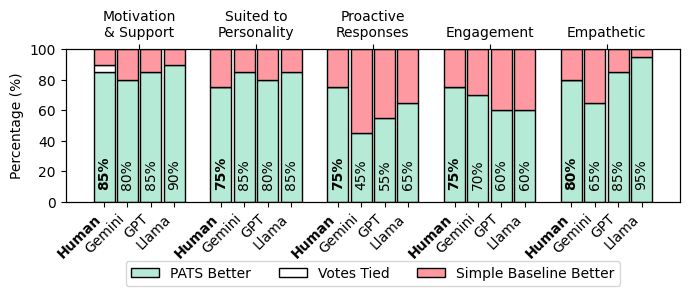

In [16]:
# Combine all L1 results into a single dictionary
l1_results = {
    "Human": results_L1,
    "Gemini": results_L1_gemini,
    "GPT": results_L1_gpt,
    "Llama": results_L1_llama,
}

# Prepare data for stacked bar chart
data_for_chart = {}
for model_name, results in l1_results.items():
    wins = [sum(x[i] > 0.51 for x in results.values()) for i in range(5)]
    ties = [sum((0.49<x[i] and x[i]<0.51) for x in results.values()) for i in range(5)]
    losses = [sum(x[i] < 0.49 for x in results.values()) for i in range(5)]
    total = [len(results) for _ in range(5)]

    data_for_chart[model_name + " Wins"] = [w / t * 100 for w, t in zip(wins, total)]
    data_for_chart[model_name + " Ties"] = [ti / t * 100 for ti, t in zip(ties, total)]
    data_for_chart[model_name + " Losses"] = [l / t * 100 for l, t in zip(losses, total)]

df_chart = pd.DataFrame(data_for_chart)

# Create grouped stacked bar chart
questions = ["Motivation\n& Support","Suited to\nPersonality","Proactive\nResponses","Engagement","Empathetic"]
models = ["Human", "Gemini", "GPT", "Llama"]

bar_width = 0.18
gap=0.2
r = np.arange(len(questions))

plt.figure(figsize=(7,4))

for i, model in enumerate(models):
    losses_percentage = df_chart[model + " Losses"]
    ties_percentage = df_chart[model + " Ties"]
    wins_percentage = df_chart[model + " Wins"]

    if i==0:
      plt.bar(r + i * gap, wins_percentage, bottom=0, color='#b5ead6', width=bar_width, label=f'PATS Better',edgecolor='black')
      plt.bar(r + i * gap, ties_percentage, bottom=wins_percentage, color='white', width=bar_width, label='Votes Tied',edgecolor='black')

      plt.bar(r + i * gap, losses_percentage, bottom=[l + ti for l, ti in zip(wins_percentage, ties_percentage)],color='#ff99a1',edgecolor='black', width=bar_width, label=f'Simple Baseline Better')
    else:
      #no labels
      plt.bar(r + i * gap, ties_percentage, bottom=wins_percentage, color='yellow', width=bar_width, edgecolor='black')
      plt.bar(r + i * gap, wins_percentage, bottom=0, color='#b5ead6', width=bar_width, edgecolor='black')
      plt.bar(r + i * gap, losses_percentage, bottom=[l + ti for l, ti in zip(wins_percentage, ties_percentage)],color='#ff99a1',edgecolor='black', width=bar_width)
    for j in range(len(questions)):
      # plt.text(r[j]+i*gap,3,model, rotation=90, horizontalalignment="center",fontweight="bold" if i==0 else "normal")
      plt.text(r[j]+i*gap,10,f"{round(wins_percentage[j])}%", rotation=90, horizontalalignment="center", fontweight="bold" if i==0 else "normal")
# plt.xticks(r + gap * (len(models) - 1) / 2, questions)


plt.xticks(sum([[x+i*(gap) for i in range(len(models))] for x in r],[]), models*len(r), rotation=45,horizontalalignment="right")
for label in plt.gca().get_xticklabels():
    if label.get_text() == "Human":
        label.set_fontweight("bold")
plt.ylabel("Percentage (%)")
# plt.title("L1 Results by Question and Model")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6), ncols=3)
xlim=plt.xlim()
ax2=plt.twiny()

ax2.set_xlim(xlim)
ax2.set_xticks(r+gap*(len(models)-1)/2)
ax2.set_xticklabels(questions,horizontalalignment="center")
plt.ylim(0, 100)




plt.tight_layout()
plt.savefig("L1_expert_slant.pdf")


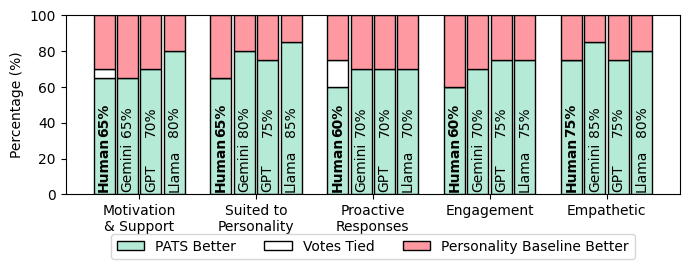

In [17]:
# Combine all L1 results into a single dictionary
l1_results = {
    "Human": results_L2,
    "Gemini": results_L2_gemini,
    "GPT": results_L2_gpt,
    "Llama": results_L2_llama,
}

# Prepare data for stacked bar chart
data_for_chart = {}
for model_name, results in l1_results.items():
    wins = [sum(x[i] > 0.51 for x in results.values()) for i in range(5)]
    ties = [sum((0.49<x[i] and x[i]<0.51) for x in results.values()) for i in range(5)]
    losses = [sum(x[i] < 0.49 for x in results.values()) for i in range(5)]
    total = [len(results) for _ in range(5)]

    data_for_chart[model_name + " Wins"] = [w / t * 100 for w, t in zip(wins, total)]
    data_for_chart[model_name + " Ties"] = [ti / t * 100 for ti, t in zip(ties, total)]
    data_for_chart[model_name + " Losses"] = [l / t * 100 for l, t in zip(losses, total)]

df_chart = pd.DataFrame(data_for_chart)

# Create grouped stacked bar chart
questions = ["Motivation\n& Support","Suited to\nPersonality","Proactive\nResponses","Engagement","Empathetic"]
models = ["Human", "Gemini", "GPT", "Llama"]

bar_width = 0.18
gap=0.2
r = np.arange(len(questions))

plt.figure(figsize=(7,3))

for i, model in enumerate(models):
    losses_percentage = df_chart[model + " Losses"]
    ties_percentage = df_chart[model + " Ties"]
    wins_percentage = df_chart[model + " Wins"]

    if i==0:
      plt.bar(r + i * gap, wins_percentage, bottom=0, color='#b5ead6', width=bar_width, label=f'PATS Better',edgecolor='black')
      plt.bar(r + i * gap, ties_percentage, bottom=wins_percentage, color='white', width=bar_width, label='Votes Tied',edgecolor='black')

      plt.bar(r + i * gap, losses_percentage, bottom=[l + ti for l, ti in zip(wins_percentage, ties_percentage)],color='#ff99a1',edgecolor='black', width=bar_width, label=f'Personality Baseline Better')
    else:
      #no labels
      plt.bar(r + i * gap, ties_percentage, bottom=wins_percentage, color='yellow', width=bar_width, edgecolor='black')
      plt.bar(r + i * gap, wins_percentage, bottom=0, color='#b5ead6', width=bar_width, edgecolor='black')
      plt.bar(r + i * gap, losses_percentage, bottom=[l + ti for l, ti in zip(wins_percentage, ties_percentage)],color='#ff99a1',edgecolor='black', width=bar_width)
    for j in range(len(questions)):
      plt.text(r[j]+i*gap,3,model, rotation=90, horizontalalignment="center",fontweight="bold" if i==0 else "normal")
      plt.text(r[j]+i*gap,34,f"{round(wins_percentage[j])}%", rotation=90, horizontalalignment="center", fontweight="bold" if i==0 else "normal")
plt.xticks(r + gap * (len(models) - 1) / 2, questions)
plt.ylabel("Percentage (%)")
# plt.title("L1 Results by Question and Model")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.4), ncols=3)
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("L2_expert.pdf")
plt.show()

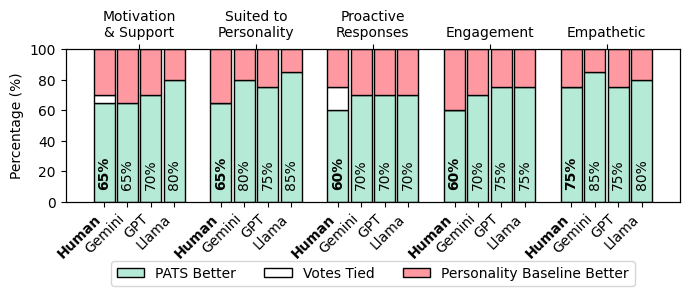

In [19]:
# Combine all L1 results into a single dictionary
l2_results = {
    "Human": results_L2,
    "Gemini": results_L2_gemini,
    "GPT": results_L2_gpt,
    "Llama": results_L2_llama,
}

# Prepare data for stacked bar chart
data_for_chart = {}
for model_name, results in l2_results.items():
    wins = [sum(x[i] > 0.51 for x in results.values()) for i in range(5)]
    ties = [sum((0.49<x[i] and x[i]<0.51) for x in results.values()) for i in range(5)]
    losses = [sum(x[i] < 0.49 for x in results.values()) for i in range(5)]
    total = [len(results) for _ in range(5)]

    data_for_chart[model_name + " Wins"] = [w / t * 100 for w, t in zip(wins, total)]
    data_for_chart[model_name + " Ties"] = [ti / t * 100 for ti, t in zip(ties, total)]
    data_for_chart[model_name + " Losses"] = [l / t * 100 for l, t in zip(losses, total)]

df_chart = pd.DataFrame(data_for_chart)

# Create grouped stacked bar chart
questions = ["Motivation\n& Support","Suited to\nPersonality","Proactive\nResponses","Engagement","Empathetic"]
models = ["Human", "Gemini", "GPT", "Llama"]

bar_width = 0.18
gap=0.2
r = np.arange(len(questions))

plt.figure(figsize=(7,4))

for i, model in enumerate(models):
    losses_percentage = df_chart[model + " Losses"]
    ties_percentage = df_chart[model + " Ties"]
    wins_percentage = df_chart[model + " Wins"]

    if i==0:
      plt.bar(r + i * gap, wins_percentage, bottom=0, color='#b5ead6', width=bar_width, label=f'PATS Better',edgecolor='black')
      plt.bar(r + i * gap, ties_percentage, bottom=wins_percentage, color='white', width=bar_width, label='Votes Tied',edgecolor='black')

      plt.bar(r + i * gap, losses_percentage, bottom=[l + ti for l, ti in zip(wins_percentage, ties_percentage)],color='#ff99a1',edgecolor='black', width=bar_width, label=f'Personality Baseline Better')
    else:
      #no labels
      plt.bar(r + i * gap, ties_percentage, bottom=wins_percentage, color='yellow', width=bar_width, edgecolor='black')
      plt.bar(r + i * gap, wins_percentage, bottom=0, color='#b5ead6', width=bar_width, edgecolor='black')
      plt.bar(r + i * gap, losses_percentage, bottom=[l + ti for l, ti in zip(wins_percentage, ties_percentage)],color='#ff99a1',edgecolor='black', width=bar_width)
    for j in range(len(questions)):
      # plt.text(r[j]+i*gap,3,model, rotation=90, horizontalalignment="center",fontweight="bold" if i==0 else "normal")
      plt.text(r[j]+i*gap,10,f"{round(wins_percentage[j])}%", rotation=90, horizontalalignment="center", fontweight="bold" if i==0 else "normal")
# plt.xticks(r + gap * (len(models) - 1) / 2, questions)


plt.xticks(sum([[x+i*(gap) for i in range(len(models))] for x in r],[]), models*len(r), rotation=45,horizontalalignment="right")
for label in plt.gca().get_xticklabels():
    if label.get_text() == "Human":
        label.set_fontweight("bold")
plt.ylabel("Percentage (%)")
# plt.title("L1 Results by Question and Model")
plt.legend(loc='lower center', bbox_to_anchor=(0.5, -0.6), ncols=3)
xlim=plt.xlim()
ax2=plt.twiny()

ax2.set_xlim(xlim)
ax2.set_xticks(r+gap*(len(models)-1)/2)
ax2.set_xticklabels(questions,horizontalalignment="center")
plt.ylim(0, 100)
plt.tight_layout()
plt.savefig("L2_expert_slant.pdf")
plt.show()